# Prever Valores de Imóveis

Esse projeto é de cunho acadêmico do **curso de Machine Learning da Alura** e tem o objetivo de trabalhar com técnicas de **Ciência de Dados**.  Nesse projeto vamos trabalhar com um  **Algortimo supervisionado** e veremos:


*   Análise descritiva
*   Transformação de dados
*   Algoritmo de regressão linear



In [0]:
import pandas as pd

In [8]:
dados = pd.read_csv('dataset.csv', sep=';')
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Análise Descritiva

A partir da análise descritiva, é possível perceber se há dados discrepantes, se há outliers, quais os valores mínimos, máximos e a média de cada variável, além dos valores de quartis e o desvio padrão.

In [9]:
dados.describe().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.0000,5000.0000,5000.0000
mean,1.402926e+06,121.9448,3.0219,0.4972
std,1.883269e+06,90.5370,3.1709,0.2914
min,7.500000e+04,16.0000,0.0000,0.0003
25%,4.600000e+05,70.0000,0.4384,0.2386
50%,8.200000e+05,93.0000,1.4770,0.5033
75%,1.590000e+06,146.0000,5.6054,0.7477
max,2.500000e+07,2000.0000,17.9629,1.0000


Com a função .describe() podemos ter acesso a descrição estatística dos dados de forma fácil. 

In [18]:
# Matriz de Correlação

dados.corr().style.background_gradient()

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1,0.710974,-0.366542,-0.0243663
Area,0.710974,1,-0.283371,-0.0309904
Dist_Praia,-0.366542,-0.283371,1,0.0256453
Dist_Farmacia,-0.0243663,-0.0309904,0.0256453,1


Através da Matriz de Corrrelação é possível analisar se uma variável tem correlação com as outras. 
A correlação é uma medida de 0 a 1 em que 0 significa sem correlação e 1 significa correlação perfeita, ela pode ser **positiva**: significa que as duas variáveis possuem a mesma direção: quando uma sobe a outra sobe também ou quando uma desce a outra desce também. Ou **negativa**: elas seguem em direção opostas.

No nosso caso a variável **área** tem forte correlação positiva com a variável **preço**, significa que quanto maior o tamanho do imóvel, maior será o preço.


In [0]:
import seaborn as sns

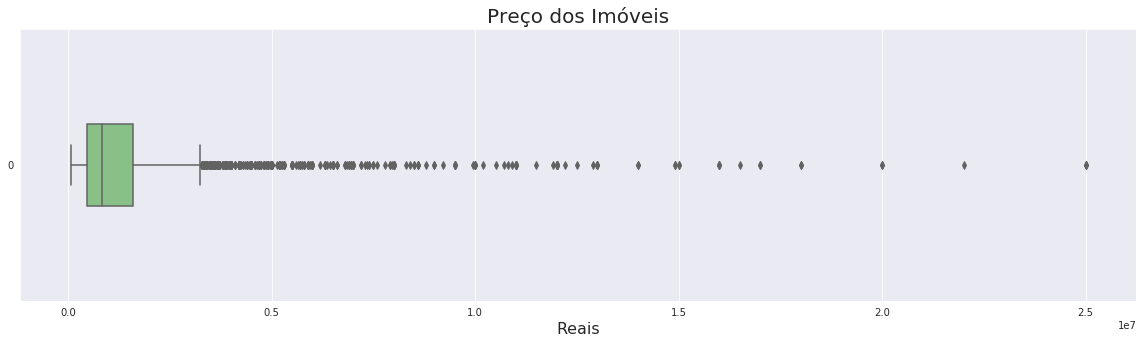

In [19]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Com o gráfico de boxplot é possível perceber como estão distribuídos os dados. 

Nesse caso é possível perceber que na variável **preço** há valores discrepantes ou outliers.

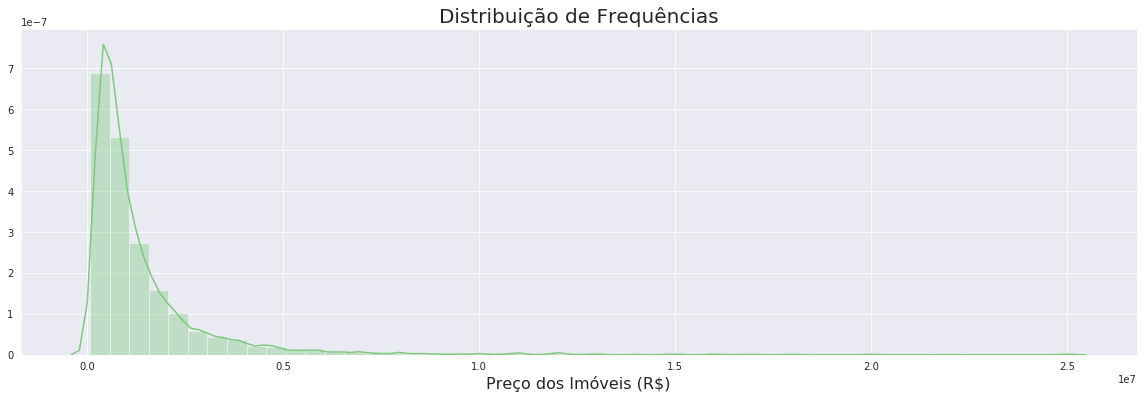

In [20]:
# Distribuição de Frequência

ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

Observando a distribuição de frequência da variável **preço** é possível notar os olutliers. A distribuição está assimétrica à direita, significa que há uma maior concentração dos dados a esquerda e um 'braço' esticado para a direita. 
Esse comportamento é compreensivo pelo fato de que a concentração de imóveis de luxo ou de alto padrão é menor que dos imóveis de classe média, portanto há menos imóveis com preços muito altos criando assim essa 'calda' de imóveis com preços muito altos e de menor frequência no dataset.

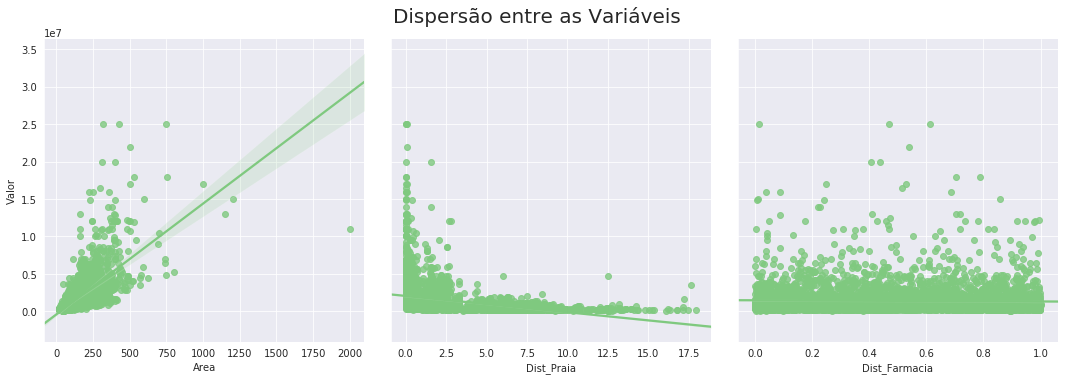

In [23]:
# Gráfico de dispersão

ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Escolhemos três variáveis: **preço**, **distância até a praia** e **distância até a farmácia**, com esses dados criamos um gráfico de dispersão. A ideia é ver se é possível **traçar uma linha** entre as variáveis, no gráfico 1 é até possível mas os pontos ainda estão dispersos, já no gráfico 2 aparentemente é possível traçar uma linha decrescente mas a maioria dos pontos ficariam de fora, já no 3º gráfico, os dados estão desconexos, de forma que não há uma correlação linear.

## Transformação dos dados

Já que os pontos ficariam muito dispersos, vamos transformá-los, ao invés de usarmos os valores inteiros reais, vamos usar o **log** dos valores. Para isso usaremos a biblioteca **Numpy**.

Importante observar que nas variáveis **Distância até a Praia e Distância até a Farmácia** há valores 0, por isso vamos adicionar o 1 para conseguir pegar o log sem perder o dado, já que não é possível pegar o log de valores 0. 

In [0]:
import numpy as np

In [26]:
np.log(1)

0.0

In [27]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


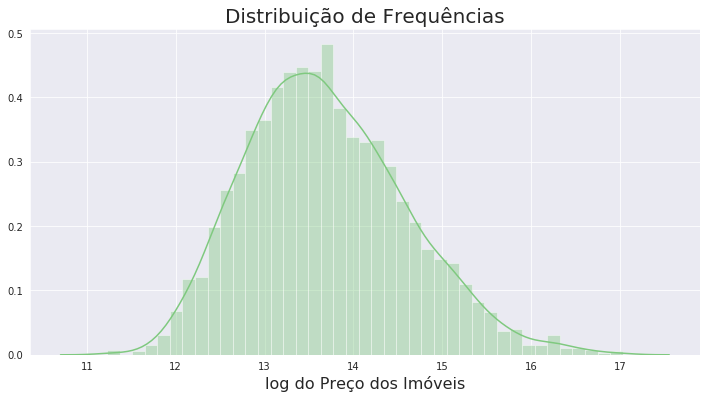

In [29]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

Com os valores transformados, é possível perceber que a distribuição da variável **preço** normalizou. 

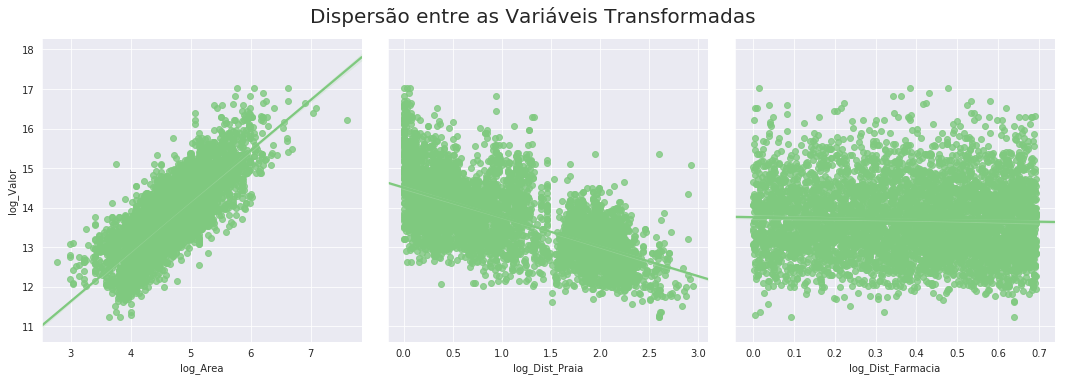

In [31]:
# Gráfico de dispersão dos Logs

ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

## Separando dados de treino e teste

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = dados['log_Valor'] # variável dependente
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']] # varáveis explicativas

In [0]:
# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

Para o modelo de regressão vamos usar a biblioteca **StatsModels**. Será preciso ter uma constante para gerar as estimativas. 
Acrescentaremos uma constante através da fução add_constant()

In [0]:
import statsmodels.api as sm

In [41]:
X_train_com_constante = sm.add_constant(X_train)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
X_train_com_constante.head()

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903


In [0]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

## Avaliando o Modelo Estimado

Vamos focar em duas métricas: teste **F** e teste **T**, ambos são testes de hipóteses e ajudam a decidir se o modelo será aceito ou não.

*  O **R² ou R-squared** considera o grau de liberdade
*  O **teste F** testa a significância do modelo
*  O **Prob (F-statistic)** é o teste do conjunto se estiver acima ou igual a 0.05 o teste é rejeitado
*  O **P>|t|** é o teste individual de cada variável, se estiver acima ou igual a 0.05 o teste é rejeitado

In [48]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:43:07   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De acordo com o teste **T**, é possível notar que a variável **Distância até a Farmácia** não tem significância para o modelo, ou seja, não explica a variável dependente. Sendo assim vamos removê-la do modelo.

## Remodelando sem a variável 

In [0]:
X = dados[['log_Area', 'log_Dist_Praia']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [53]:
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:01:45   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.353      0.000       9.219       9.450
log_Area           1.0581      0.012     89.345      0.000       1.035       1.081
log_Dist_Praia    -0.4906      0.009    -56.709      0.000      -0.508      -0.474
==============================================================================
Omnibus:                       65.115   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.712
Skew:                           0.136   Prob(JB):                     4.08e-24
Kurtosis:                       3.757   Cond. No.                         46.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Estimando os valores

Uma vez feito os testes formais, vamos prever os valores com **Scikit-Learn**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

### Instanciando o modelo LinearRegression()

In [0]:
modelo =  LinearRegression() 

In [57]:
# treinando o modelo
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


Observe que o R² do modelo é o mesmo do modelo anterior com o StatsModels

### Criando as previsões

In [0]:
y_previsto = modelo.predict(X_test)

In [63]:
print('R² do valor previsto = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² do valor previsto = 0.79


## Interpretação dos coeficientes estimados

Como transformamos nossos dados em **logs** precisaremos desfazer essa transformação para obtermos o valor em reais.

O intercepto representa o efeito médio em Y (preço do Imóvel) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear, este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em reais(R$). 

In [64]:
modelo.intercept_

9.334916409800329

In [65]:
np.exp(modelo.intercept_)

11326.681428069842

Retirando os efeitos das variáveis explicativas o valor médio é de R$ 11.326,70

In [0]:
index = ['Intercepto','log Área', 'log Distância até a Praia']

In [68]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área,1.058078
log Distância até a Praia,-0.490612


**INTERPRETAÇÃO**

**Intercepto**: excluindo o efeito das variáveis explicativas (X2 = X3 = 0 ) o efeito médio o Preço dos Imóveis seria de R$ 11.326,68 (exp[9.334916]).

**Área(m²)**: Mantendo-se o valor de X3 (Distância até a Praia) constante, um acréscimo de 1% ma Área de imóvel gera, em média, um acréscimo de 1.06% no Preço Imóvel.

**Distância até a Praia(km)**: mantendo-se o valor de X2 (Área) constante, um acréscimo de 1% da Distância de um imóvel até a praia gera, em média, decréscimo de 0.49% no Preço do Imóvel.

### Análise Gráfica do Modelo

In [0]:
y_previsto_train = modelo.predict(X_train)

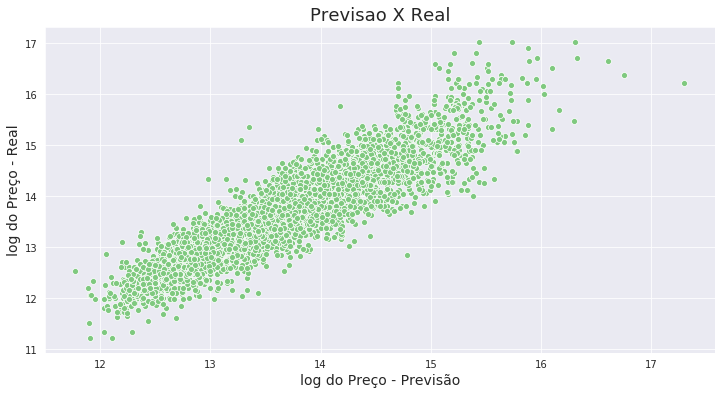

In [70]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

É possível perceber que os dados não estão tão dispersos, de forma que nosso modelo está aceitávelmente preciso.
Claro que para deixar mais preciso seria necessário incluir mais variáveis para aproximar ainda mais os pontos.

#### Obtendo o resíduo

Que é justamente o valor real menos o valor previsto

In [0]:
residuo = y_train - y_previsto_train

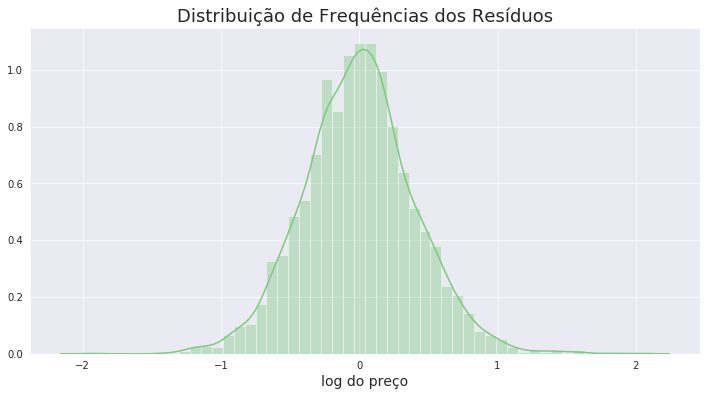

In [72]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do preço', fontsize=14)
ax

Como vimos a distribuição dos resíduos está normal o que nos permite dizer que o modelo está assertivo.

Portanto é possível concluir que a variável explicativa que interfere positivamente no preço do imóvel é a área, quanto maior a área do imóvel, maior será o preço, já com relação a variável distância até a praia, da-se o contrário, quanto mais longe da praia for o imóvel, menor será o preço.